In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
path = 'los_angeles/'
file = 'tomslee_airbnb_los_angeles_1422_2017-07-08.csv'

In [3]:
df1 = pd.read_csv(path+file)

(0, 2000)

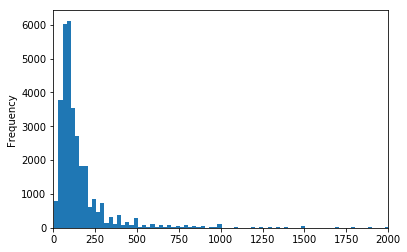

In [34]:
ax = pd.to_numeric(df1['price']).plot.hist(bins=1000)
ax.set_xlim([0,2000])

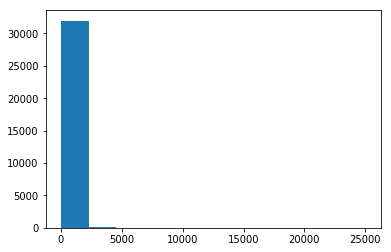

In [35]:
n, bins, patches = plt.hist(pd.to_numeric(df1['price']), bins = 11)

In [37]:
pd.qcut(df1['price'], 11)



0        (130.0, 160.0]
1        (110.0, 130.0]
2        (110.0, 130.0]
3        (110.0, 130.0]
4        (110.0, 130.0]
5        (110.0, 130.0]
6        (130.0, 160.0]
7        (110.0, 130.0]
8        (110.0, 130.0]
9        (110.0, 130.0]
10        (98.0, 110.0]
11        (98.0, 110.0]
12        (98.0, 110.0]
13        (98.0, 110.0]
14        (98.0, 110.0]
15       (110.0, 130.0]
16       (110.0, 130.0]
17       (110.0, 130.0]
18       (110.0, 130.0]
19       (72.818, 85.0]
20        (98.0, 110.0]
21         (85.0, 98.0]
22         (85.0, 98.0]
23       (72.818, 85.0]
24        (98.0, 110.0]
25         (85.0, 98.0]
26       (72.818, 85.0]
27         (85.0, 98.0]
28         (85.0, 98.0]
29        (98.0, 110.0]
              ...      
32116     (4.999, 45.0]
32117     (4.999, 45.0]
32118     (4.999, 45.0]
32119     (4.999, 45.0]
32120     (4.999, 45.0]
32121     (4.999, 45.0]
32122     (4.999, 45.0]
32123     (4.999, 45.0]
32124     (4.999, 45.0]
32125     (4.999, 45.0]
32126     (4.999

In [5]:
# bins = 10
bins = pd.IntervalIndex.from_tuples([(0,35),(35,50),(50,75),(75,100),(100,125),(125,150),(150,200),(200, 250),(250,500),(500, 1000), (1000, 2000), (2000, 50000)])
df1['price_bins'] = pd.cut(df1['price'], bins)

d = {}
for ik_ind, ik in enumerate(list(set(df1['price_bins']))):
      d[ik] = ik_ind
        
pb = []
for ik in range(len(df1['price_bins'])):
    pb.append(d[df1['price_bins'][ik]])
    
df1['price_bins2'] = pb

In [38]:
grps = df1.groupby(df1.overall_satisfaction)
for grp in grps:
    print(grp[0], len(grp[1]))

0.0 12480
1.0 4
1.5 2
2.0 3
2.5 19
3.0 34
3.5 185
4.0 958
4.5 6248
5.0 12213


In [7]:
for col in df1.columns:
    try:
        df1[col] = pd.to_numeric(df1[col])
    except:
        pass

In [8]:
features = []
for col in df1.columns:
    if col not in ['country', 'location','price_bins','borough', 'bathrooms', 'room_id', 'survey_id', 'host_id', 'minstay', 'last_modified', 'city']:
        features.append(col)

In [9]:
df2 = pd.get_dummies(df1[features])
df2.dropna()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,price_bins2,room_type_Entire home/apt,room_type_Private room,...,neighborhood_Westchester,neighborhood_Westlake,neighborhood_Westmont,neighborhood_Westwood,neighborhood_Whittier,neighborhood_Willowbrook,neighborhood_Wilmington,neighborhood_Windsor Square,neighborhood_Winnetka,neighborhood_Woodland Hills
0,1,0.0,4,1.0,150.0,34.043394,-118.233189,6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,1,1.0,130.0,33.765878,-118.184296,6,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,2,1.0,130.0,33.782263,-118.191232,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,1,1.0,125.0,34.152230,-118.248960,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,1,1.0,120.0,34.064526,-118.292650,11,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0.0,1,1.0,121.0,34.102701,-118.332598,11,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0.0,2,1.0,135.0,34.061951,-118.470571,6,0,0,...,0,0,0,0,0,0,0,0,0,0
7,31,4.5,2,1.0,125.0,34.021322,-118.499728,11,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0.0,10,1.0,120.0,34.158429,-118.616474,11,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0.0,1,1.0,120.0,34.104263,-118.300371,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
features2 = [col for col in df2.columns]

In [11]:
target = 'overall_satisfaction'
features2.remove(target)

In [13]:
Y = df2[target].apply(str)
X = df2[features2]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=3)

In [28]:
# Decsion Tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=90,
    random_state = 1337
)

print('cross val scores:', cross_val_score(decision_tree, X_train, y_train, cv=10))

import time
start_time = time.time()

decision_tree.fit(X_train, y_train)

mid_time = time.time()

preds = decision_tree.predict(X_test)
end_time = time.time()

print('fit-predict time:', end_time-start_time)
print('fit time:', mid_time-start_time)
print('predict time:', end_time-mid_time)

y = 0
y_tst = list(y_test)

for pred_ind, pred in enumerate(preds):
    if pred == str(y_tst[pred_ind]):
        y+=1

print('accuracy:', y/len(y_tst))

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


cross val scores: [ 0.7218543   0.71812914  0.68615257  0.6840796   0.70924927  0.71398921
  0.70029058  0.69406393  0.69655459  0.70989194]
fit-predict time: 0.23566627502441406
fit time: 0.218886137008667
predict time: 0.01678013801574707
accuracy: 0.7103396789846957


In [32]:
# Random Forest
rfc = ensemble.RandomForestClassifier(n_estimators = 25)

print('cross val scores:', cross_val_score(rfc, X_train, y_train, cv=10))

start_time = time.time()
rfc.fit(X_train, y_train)

mid_time = time.time()

preds = rfc.predict(X_test)
end_time = time.time()

print('fit-predict time:', end_time-start_time)
print('fit time:', mid_time-start_time)
print('predict time:', end_time-mid_time)

y = 0
y_tst = list(y_test)

for pred_ind, pred in enumerate(preds):
    if pred == str(y_tst[pred_ind]):
        y+=1

print('accuracy:', y/len(y_tst))

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


cross val scores: [ 0.78021523  0.75993377  0.76907131  0.76616915  0.7669017   0.75633043
  0.76878373  0.77334994  0.76712329  0.76891106]
fit-predict time: 1.7508320808410645
fit time: 1.651724100112915
predict time: 0.09910798072814941
accuracy: 0.76334453154162
